# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [61]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
import graphviz
import pydotplus
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [93]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/blood_diseases_matched_alb_full.csv')

In [94]:
df.LOS_days.value_counts()

2    12572
1     7238
0     4842
Name: LOS_days, dtype: int64

In [63]:
df.head()

encounterid  ICU  mass_transfusion  \
0  4f8fae0f-a286-4120-b78c-c60086d95f88    1                 0   
1  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a    1                 1   
2  2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb    0                 0   
3  57dc97c2-2c28-43a1-8c15-bf7d918c6adc    0                 0   
4  83aedaea-94b0-405c-a1ea-94fee7f50b52    1                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  qSOFA  Cirrhosis  \
0                   1            2.0    6               2.9      1          0   
1                   0            0.0    4               3.1      0          1   
2                   0            1.0    3               2.2      0          1   
3                   0            3.0    2               1.5      0          1   
4                   0            0.0    4               3.5      1          0   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             1            0    34          0.645094          0.597543   
1             0            0    18          0.890293          2.093735   
2             0            0    29          0.623356          0.503817   
3             0            0    43          0.638567          0.569151   
4             1            0    34          0.655054          0.641330   

   albumin                              personid  albumin_24hrs  LOS_days  \
0        1  001c4742-8e99-4929-9b1c-0b8c6f3e230a            0.0         2   
1        1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f            0.0         2   
2        1  10b58aae-9abd-40f6-b1ed-fb394b5a8e57            0.0         2   
3        1  138a5556-63ee-4e60-b826-e1dc72628a0a            0.0         1   
4        1  1df390c3-18b8-41b0-acd9-23495059e97a            1.0         2   

   30_day_mortality  30_day_readmission  
0                 0                   0  
1                 0                   1  
2                 0                   0  
3                 0                   0  
4                 0                   1

In [64]:
df.shape

(24652, 20)

In [67]:
df.drop(columns=['personid', 'encounterid', '30_day_readmission', '30_day_mortality', 'propensity_score', 'propensity_logit', 'albumin'], inplace=True)

In [68]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0               2.9      1          0             1            0    34   
1               3.1      0          1             0            0    18   
2               2.2      0          1             0            0    29   
3               1.5      0          1             0            0    43   
4               3.5      1          0             1            0    34   

   albumin_24hrs  LOS_days  
0            0.0         2  
1            0.0         2  
2            0.0         2  
3            0.0         1  
4            1.0         2

In [69]:
# remove non-baseline variables

# df.drop(columns=['ICU', 'total_transfusions', 'mass_transfusion', 'beta_blocker', 'Cirrhosis', 'hemorrhagic', 'bl_albumin_value'], inplace=True)

In [70]:
df.describe()

ICU  mass_transfusion  total_transfusions  anemia_status  \
count  24652.000000      24652.000000        24652.000000   24652.000000   
mean       0.325450          0.065715            0.595489       1.587579   
std        0.468552          0.247788            0.964087       1.129193   
min        0.000000          0.000000            0.000000       0.000000   
25%        0.000000          0.000000            0.000000       0.000000   
50%        0.000000          0.000000            0.000000       2.000000   
75%        1.000000          0.000000            1.000000       2.000000   
max        1.000000          1.000000            5.000000       3.000000   

                CCI  bl_albumin_value         qSOFA     Cirrhosis  \
count  24652.000000      24652.000000  24652.000000  24652.000000   
mean       5.104860          2.720228      0.749432      0.452823   
std        2.801044          0.696009      0.792577      0.497779   
min        0.000000          0.002700      0.000000      0.000000   
25%        3.000000          2.200000      0.000000      0.000000   
50%        5.000000          2.700000      1.000000      0.000000   
75%        7.000000          3.200000      1.000000      1.000000   
max       19.000000          5.600000      3.000000      1.000000   

       beta_blocker   hemorrhagic          SAPS  albumin_24hrs      LOS_days  
count  24652.000000  24652.000000  24652.000000   24652.000000  24652.000000  
mean       0.416112      0.145140     30.718522       0.210693      1.313565  
std        0.492923      0.352249     12.217253       0.407809      0.779804  
min        0.000000      0.000000      0.000000       0.000000      0.000000  
25%        0.000000      0.000000     22.000000       0.000000      1.000000  
50%        0.000000      0.000000     29.000000       0.000000      2.000000  
75%        1.000000      0.000000     38.000000       0.000000      2.000000  
max        1.000000      1.000000     64.000000       1.000000      2.000000

In [71]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

## Modeling

In [72]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [73]:
cols

Index(['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI',
       'bl_albumin_value', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic',
       'SAPS', 'albumin_24hrs'],
      dtype='object')

## Standardize Data

In [74]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [75]:
X.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0               2.9      1          0             1            0    34   
1               3.1      0          1             0            0    18   
2               2.2      0          1             0            0    29   
3               1.5      0          1             0            0    43   
4               3.5      1          0             1            0    34   

   albumin_24hrs  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            1.0

## Train Test Split

In [76]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [77]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.21308
Feature: mass_transfusion Score: -0.16454
Feature: total_transfusions Score: 0.00832
Feature: anemia_status Score: 0.09521
Feature: CCI Score: -0.07666
Feature: bl_albumin_value Score: 0.10877
Feature: qSOFA Score: -0.07868
Feature: Cirrhosis Score: 0.34537
Feature: beta_blocker Score: -0.29744
Feature: hemorrhagic Score: -0.15673
Feature: SAPS Score: -0.00462
Feature: albumin_24hrs Score: -0.16444


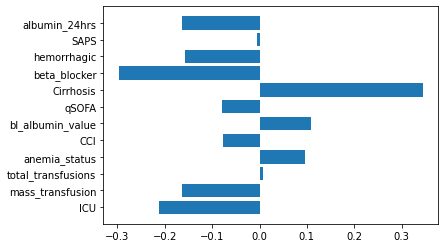

In [78]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [79]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

                    Importance
Cirrhosis             1.412511
bl_albumin_value      1.114902
anemia_status         1.099889
total_transfusions    1.008357
SAPS                  0.995391
CCI                   0.926203
qSOFA                 0.924331
hemorrhagic           0.854935
albumin_24hrs         0.848366
mass_transfusion      0.848282
ICU                   0.808091
beta_blocker          0.742716


In [80]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [81]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 337  566 2965]
 [ 307  743 4687]
 [ 280  695 9141]]


In [82]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.36      0.09      0.14      3868
           1       0.37      0.13      0.19      5737
           2       0.54      0.90      0.68     10116

    accuracy                           0.52     19721
   macro avg       0.43      0.37      0.34     19721
weighted avg       0.46      0.52      0.43     19721



In [83]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[  95  141  738]
 [  66  197 1238]
 [  76  143 2237]]


In [84]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.40      0.10      0.16       974
           1       0.41      0.13      0.20      1501
           2       0.53      0.91      0.67      2456

    accuracy                           0.51      4931
   macro avg       0.45      0.38      0.34      4931
weighted avg       0.47      0.51      0.43      4931



## 1: Decision Tree (Max Depth=3)

In [85]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [86]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.37710
Feature: CCI Score: 0.19000
Feature: bl_albumin_value Score: 0.00000
Feature: qSOFA Score: 0.00000
Feature: Cirrhosis Score: 0.28854
Feature: beta_blocker Score: 0.09148
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.05290
Feature: albumin_24hrs Score: 0.00000


In [87]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [88]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[    0     0  3868]
 [    0     0  5737]
 [    0     0 10116]]


In [89]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3868
           1       0.00      0.00      0.00      5737
           2       0.51      1.00      0.68     10116

    accuracy                           0.51     19721
   macro avg       0.17      0.33      0.23     19721
weighted avg       0.26      0.51      0.35     19721



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[   0    0  974]
 [   0    0 1501]
 [   0    0 2456]]


In [91]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       974
           1       0.00      0.00      0.00      1501
           2       0.50      1.00      0.66      2456

    accuracy                           0.50      4931
   macro avg       0.17      0.33      0.22      4931
weighted avg       0.25      0.50      0.33      4931



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [30]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D3_NCBL.png')

True

## 2: Decision Tree (Max Depth=4)

In [95]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [96]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.28840
Feature: CCI Score: 0.22494
Feature: bl_albumin_value Score: 0.03648
Feature: qSOFA Score: 0.02205
Feature: Cirrhosis Score: 0.22067
Feature: beta_blocker Score: 0.14067
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.06678
Feature: albumin_24hrs Score: 0.00000


In [97]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [98]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[   0  648 3220]
 [   0  801 4936]
 [   0  690 9426]]


In [99]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3868
           1       0.37      0.14      0.20      5737
           2       0.54      0.93      0.68     10116

    accuracy                           0.52     19721
   macro avg       0.30      0.36      0.29     19721
weighted avg       0.38      0.52      0.41     19721



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[   0  162  812]
 [   0  201 1300]
 [   0  152 2304]]


In [101]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       974
           1       0.39      0.13      0.20      1501
           2       0.52      0.94      0.67      2456

    accuracy                           0.51      4931
   macro avg       0.30      0.36      0.29      4931
weighted avg       0.38      0.51      0.39      4931



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


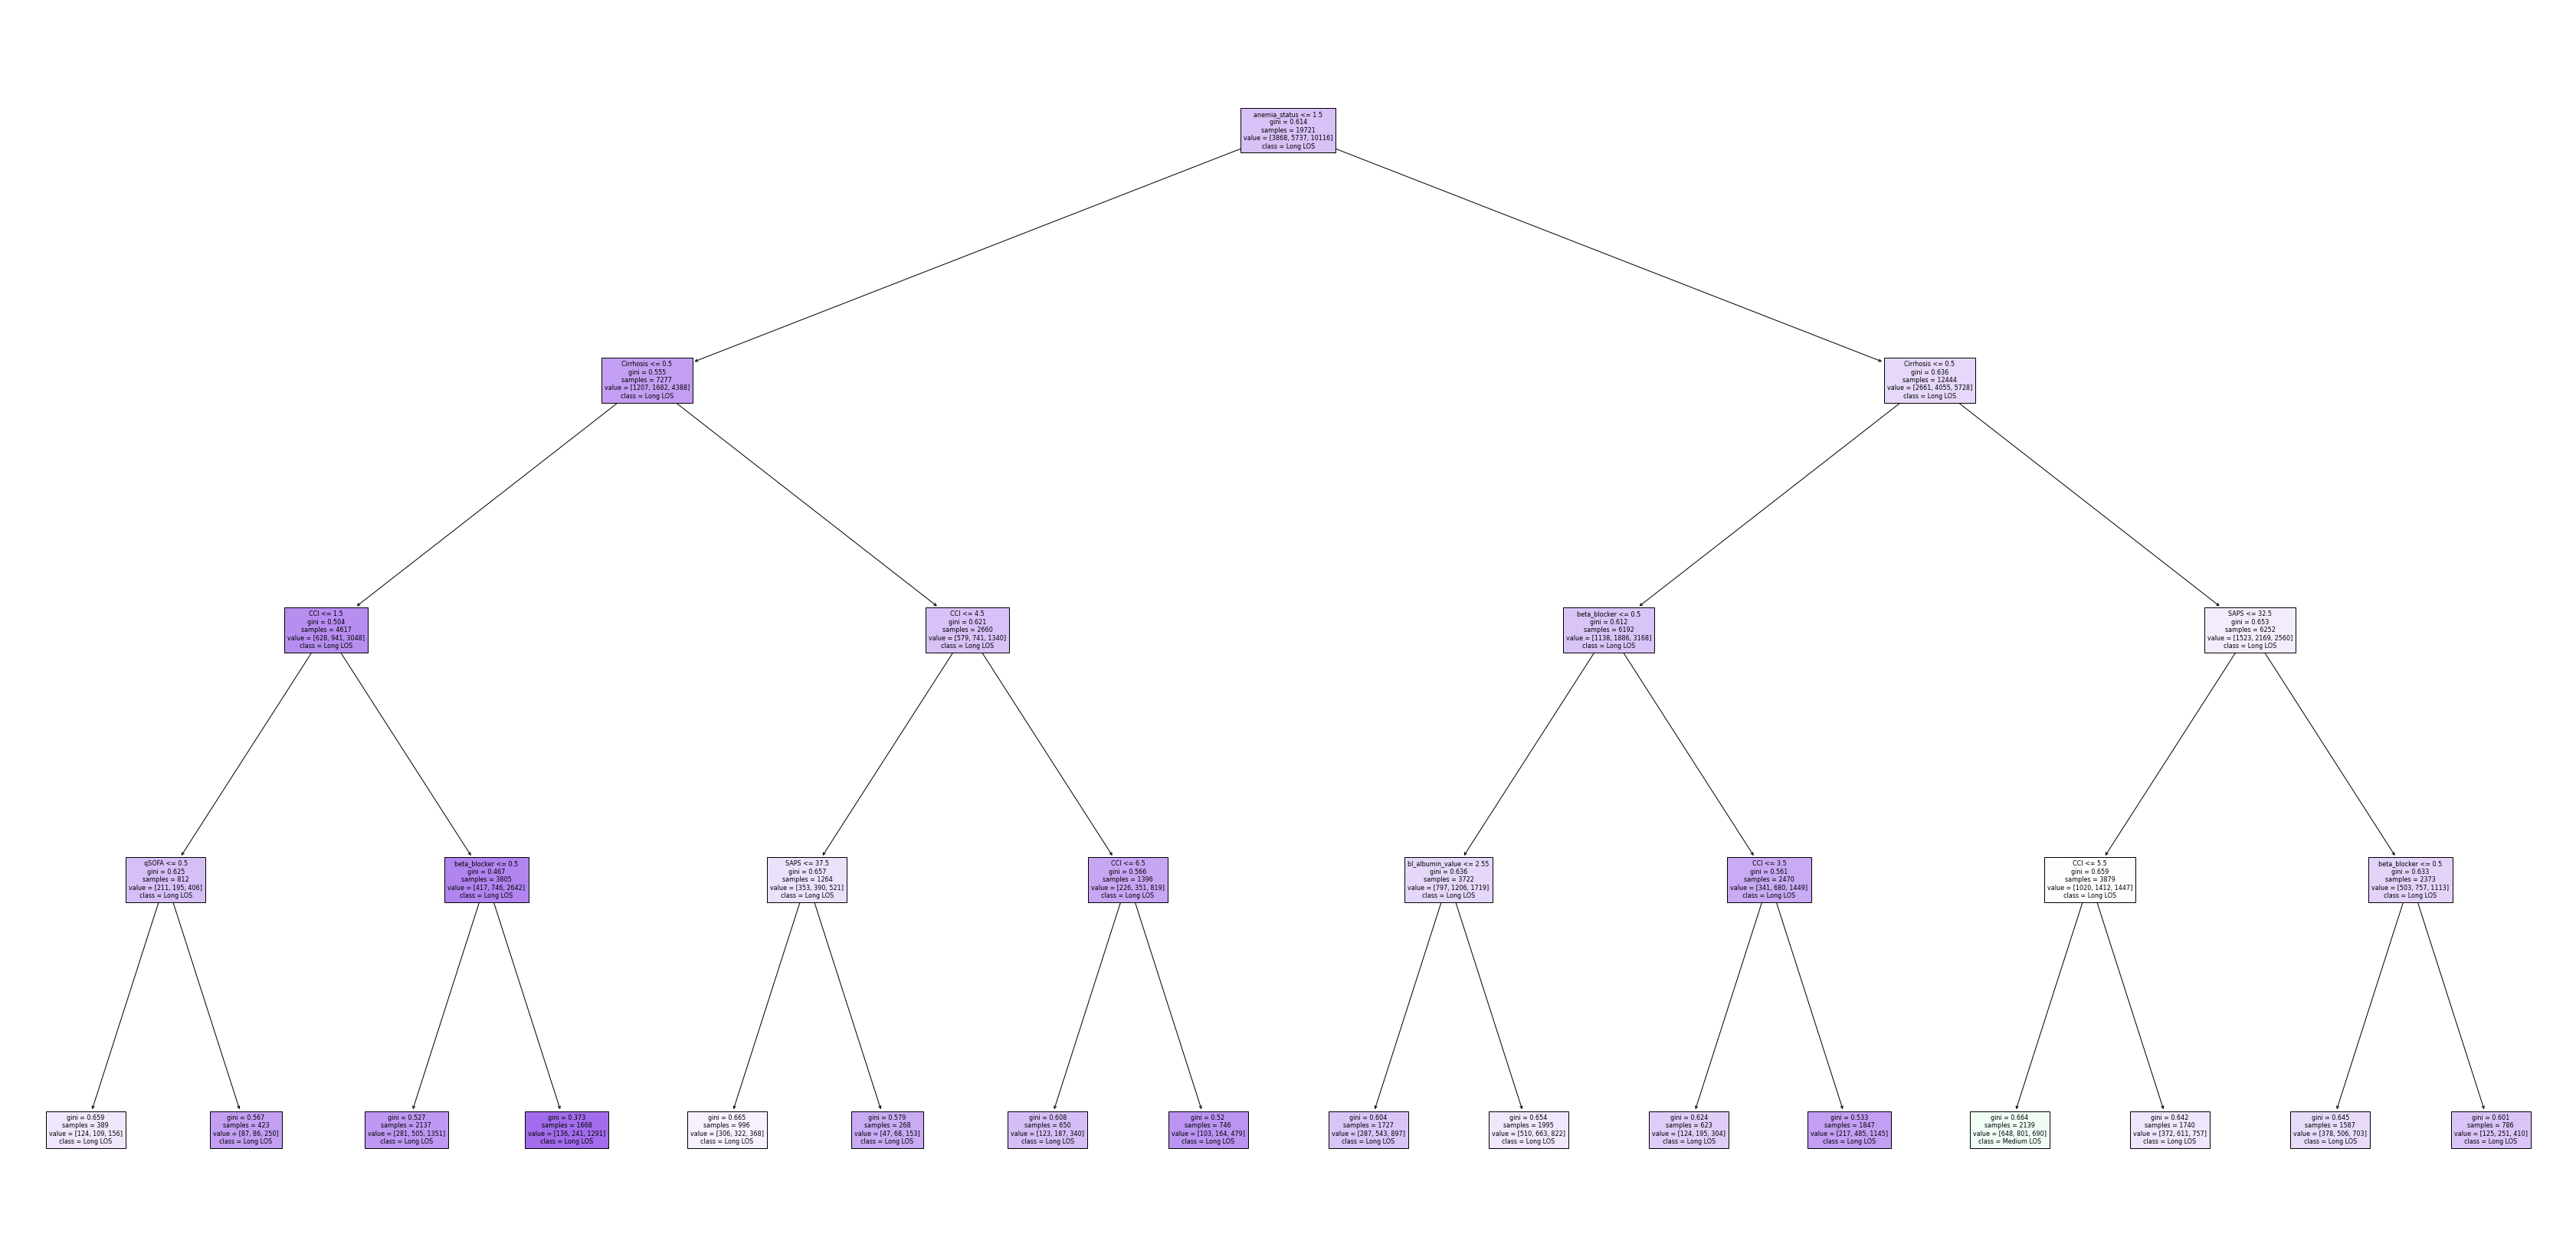

In [102]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [39]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D4_NCBL.png')

True

## 3: Decision Tree 

In [103]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [104]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.01050
Feature: total_transfusions Score: 0.00811
Feature: anemia_status Score: 0.24672
Feature: CCI Score: 0.21407
Feature: bl_albumin_value Score: 0.08649
Feature: qSOFA Score: 0.04555
Feature: Cirrhosis Score: 0.18028
Feature: beta_blocker Score: 0.12312
Feature: hemorrhagic Score: 0.01290
Feature: SAPS Score: 0.06778
Feature: albumin_24hrs Score: 0.00448


In [105]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [106]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 175  648 3045]
 [ 164  801 4772]
 [ 152  690 9274]]


In [107]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.36      0.05      0.08      3868
           1       0.37      0.14      0.20      5737
           2       0.54      0.92      0.68     10116

    accuracy                           0.52     19721
   macro avg       0.42      0.37      0.32     19721
weighted avg       0.46      0.52      0.42     19721



In [108]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[  41  162  771]
 [  37  201 1263]
 [  49  152 2255]]


In [109]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.32      0.04      0.07       974
           1       0.39      0.13      0.20      1501
           2       0.53      0.92      0.67      2456

    accuracy                           0.51      4931
   macro avg       0.41      0.36      0.31      4931
weighted avg       0.44      0.51      0.41      4931



In [110]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [48]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D5_NCBL.png')

True

## 4: Decision Tree 

In [49]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

In [50]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: anemia_status Score: 0.18661
Feature: CCI Score: 0.44214
Feature: albumin_24hrs Score: 0.01601
Feature: qSOFA Score: 0.20915
Feature: SAPS Score: 0.14609


In [51]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [52]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[18245   622  3399]
 [ 9436   710  3818]
 [ 6331   489  5837]]


In [53]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65     22266
           1       0.39      0.05      0.09     13964
           2       0.45      0.46      0.45     12657

    accuracy                           0.51     48887
   macro avg       0.46      0.44      0.40     48887
weighted avg       0.47      0.51      0.44     48887



In [54]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4562  170  900]
 [2345  181  947]
 [1586  134 1397]]


In [55]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65      5632
           1       0.37      0.05      0.09      3473
           2       0.43      0.45      0.44      3117

    accuracy                           0.50     12222
   macro avg       0.45      0.44      0.39     12222
weighted avg       0.46      0.50      0.44     12222



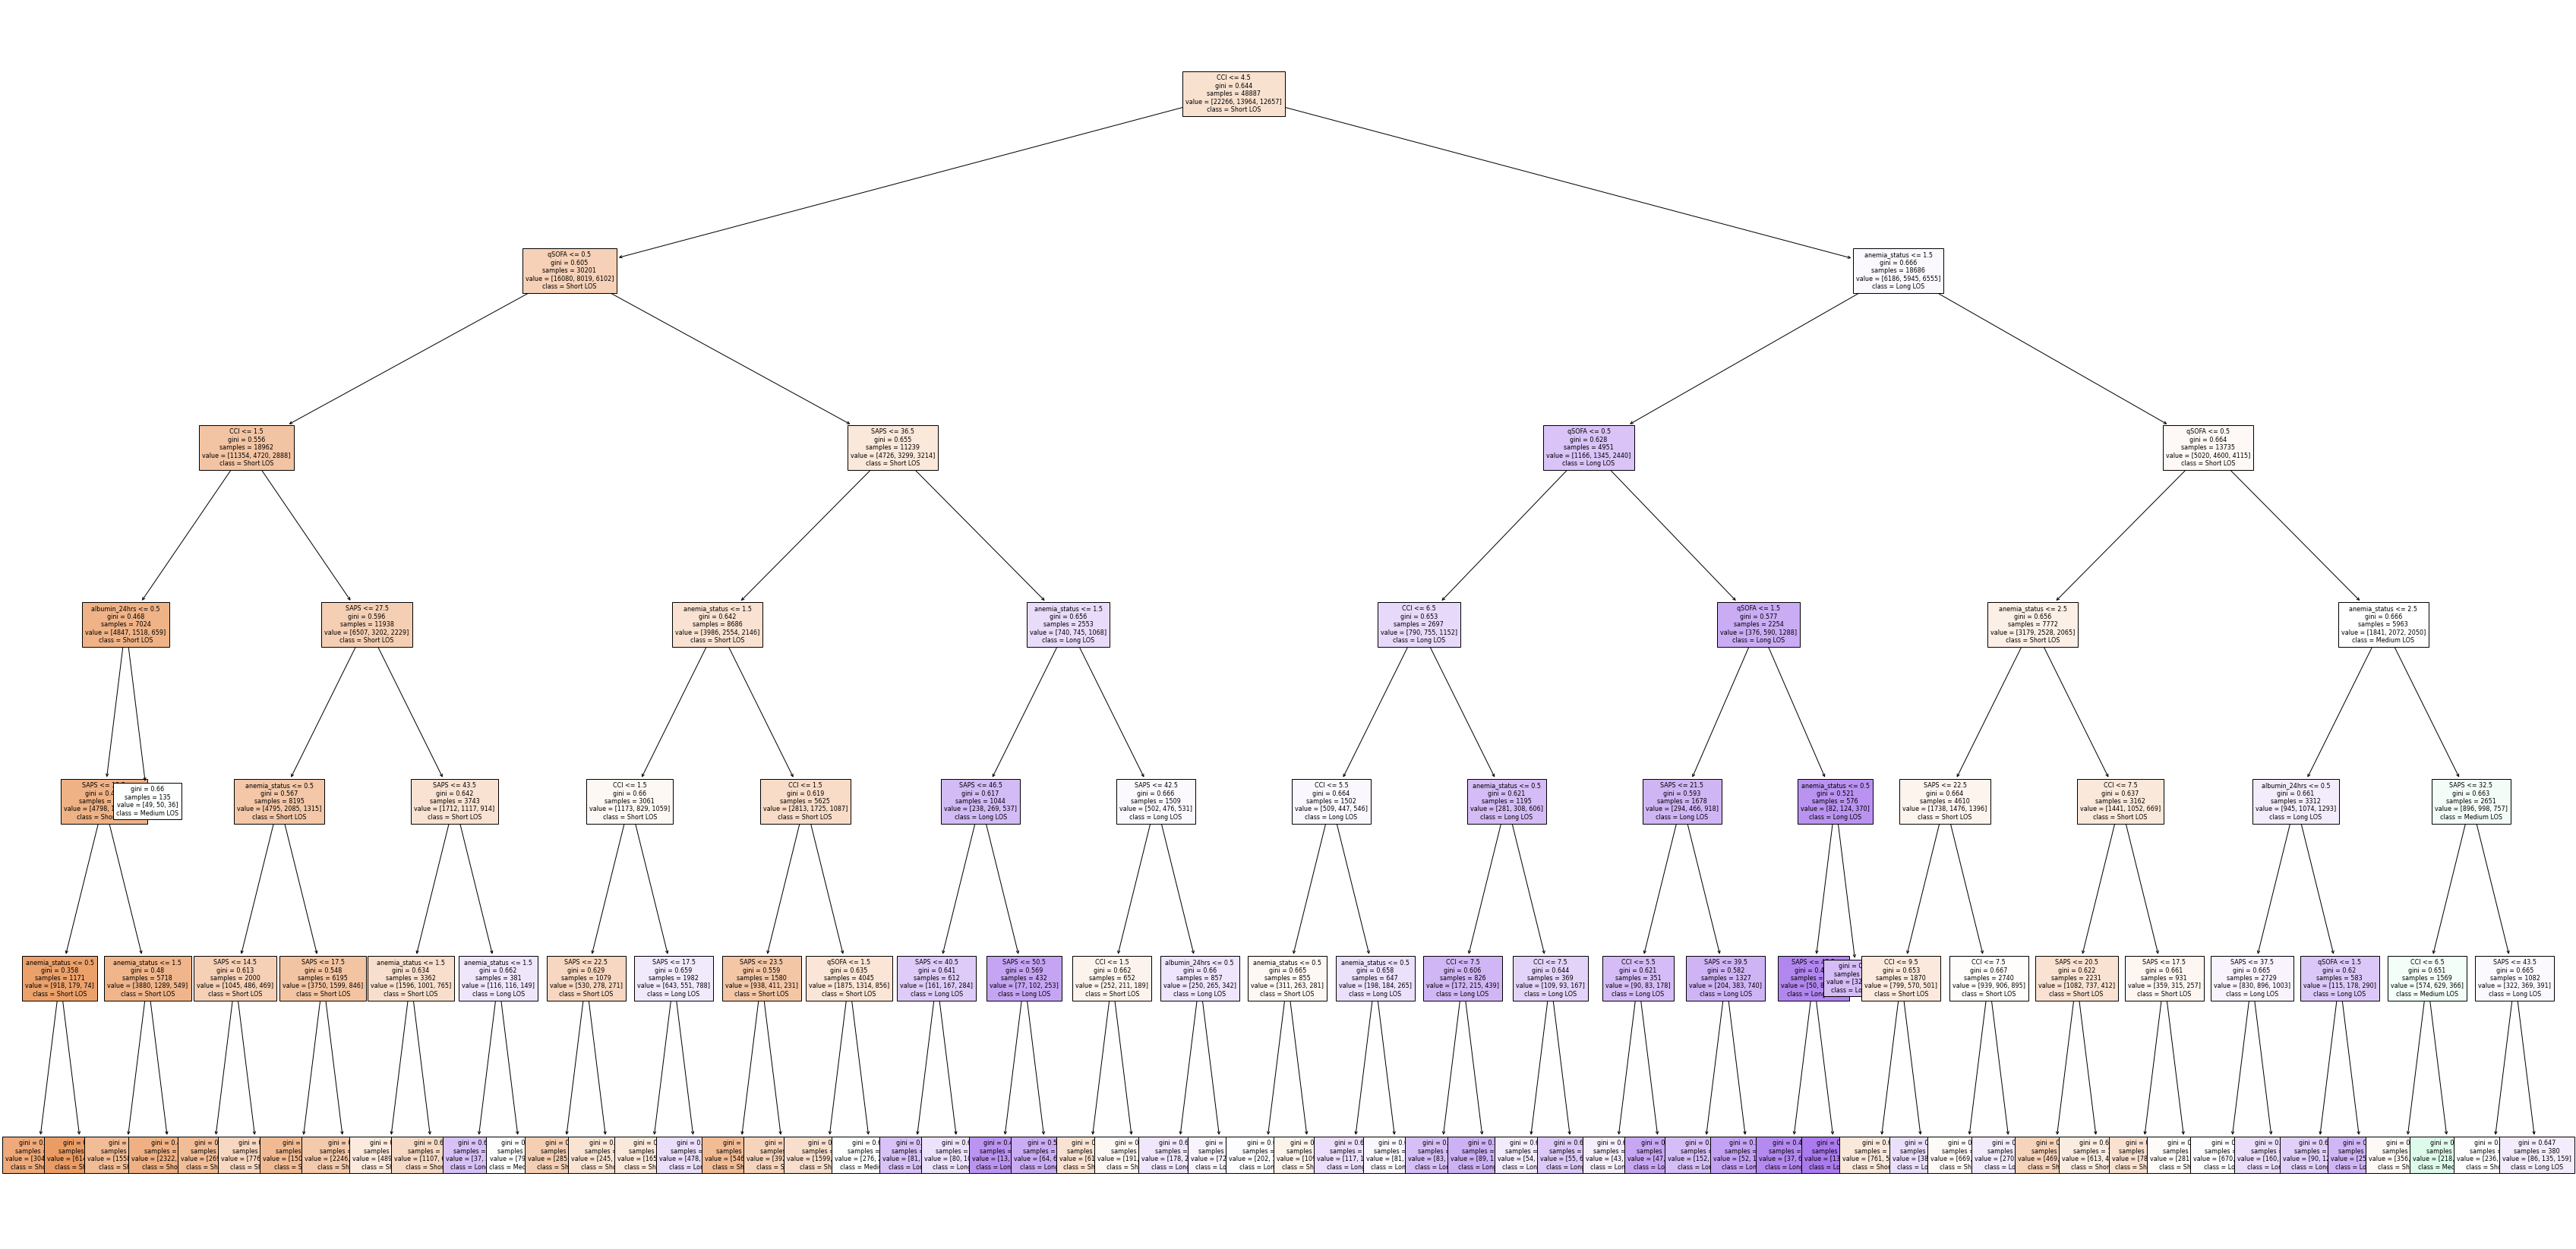

In [56]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [57]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D6_NCBL.png')

True

## 5: Decision Tree 

In [58]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: anemia_status Score: 0.17732
Feature: CCI Score: 0.43507
Feature: albumin_24hrs Score: 0.02560
Feature: qSOFA Score: 0.20423
Feature: SAPS Score: 0.15779


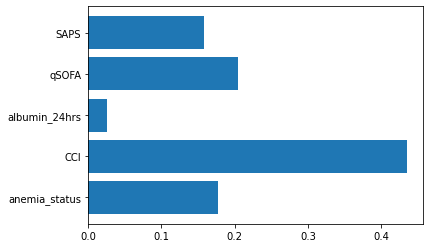

In [59]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [60]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [61]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[18286   781  3199]
 [ 9321  1015  3628]
 [ 6205   710  5742]]


In [62]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65     22266
           1       0.41      0.07      0.12     13964
           2       0.46      0.45      0.46     12657

    accuracy                           0.51     48887
   macro avg       0.47      0.45      0.41     48887
weighted avg       0.48      0.51      0.45     48887



In [63]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4566  231  835]
 [2343  215  915]
 [1551  199 1367]]


In [64]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65      5632
           1       0.33      0.06      0.10      3473
           2       0.44      0.44      0.44      3117

    accuracy                           0.50     12222
   macro avg       0.44      0.44      0.40     12222
weighted avg       0.46      0.50      0.44     12222



In [65]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [66]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D7_NCBL.png')

True

## Random Forest

In [67]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [68]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [69]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[18672   637  2957]
 [ 9614   836  3514]
 [ 6440   612  5605]]


In [70]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.54      0.84      0.66     22266
           1       0.40      0.06      0.10     13964
           2       0.46      0.44      0.45     12657

    accuracy                           0.51     48887
   macro avg       0.47      0.45      0.40     48887
weighted avg       0.48      0.51      0.45     48887



In [71]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4688  168  776]
 [2396  191  886]
 [1603  152 1362]]


In [72]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.54      0.83      0.65      5632
           1       0.37      0.05      0.10      3473
           2       0.45      0.44      0.44      3117

    accuracy                           0.51     12222
   macro avg       0.45      0.44      0.40     12222
weighted avg       0.47      0.51      0.44     12222



In [73]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: anemia_status Score: 0.16072
Feature: CCI Score: 0.41386
Feature: albumin_24hrs Score: 0.03637
Feature: qSOFA Score: 0.17950
Feature: SAPS Score: 0.20956
